# Exploratory Data Analysis

In this notebook, I will be analyzing, visually and statistically, the different features in the Heart Failure dataset
from Kaggle. I want to see how each feature impacts the likelihood of Heart Failure and uncover hidden patterns within
the data.

In [19]:
# Importing all the relevant libraries for Exploratory Data Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('Data/HeartDataWrangling.csv',index_col=0)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBPQuartile,CholesterolQuartile,MaxHRQuartile,AgeQuartile
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,3Q,4Q,4Q,1Q
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,4Q,1Q,3Q,2Q
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,2Q,4Q,1Q,1Q
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,3Q,1Q,1Q,2Q
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,4Q,1Q,2Q,2Q


In [20]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,243.211559,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.430044,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


([<matplotlib.patches.Wedge at 0x7fdd6800df10>,
 [Text(-0.1819344517167851, 1.0848501533753465, 'Has Heart Disease'),
  Text(0.1819345532877861, -1.0848501363414091, 'No Heart Disease')],
 [Text(-0.09923697366370095, 0.5917364472956436, '55.3%'),
  Text(0.09923702906606513, -0.5917364380044049, '44.7%')])

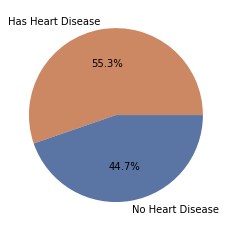

In [8]:
hd_list = df['HeartDisease'].value_counts()
labels = 'Has Heart Disease', 'No Heart Disease'
color = ['#cc8863', '#5a75a4']
plt.pie(hd_list, labels=labels, autopct='%1.1f%%', colors=color)

55.3% of the participants in the dataset have heart disease while 44.7% of the participants do not.

In [22]:
def plot_percentage(df, col, target):
    x,y = col, target
    temp_df = df.groupby(x)[y].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('percent').reset_index()
    temp_df = temp_df[temp_df.HeartDisease != 0]
    
    order_list = list(df[col].unique())
    order_list.sort()

    # Plot the figure
    sns.set(font_scale=1.5)
    g = sns.catplot(x=x, y='percent', hue=x,kind='bar', data=temp_df, 
                    height=8, aspect=2, order=order_list, legend_out=False, dodge=False)
    g.ax.set_ylim(0,100)
    
        
    # Set labels and title
    plt.title(f'{col.title()} By Percent {target.title()}', 
              fontdict={'fontsize': 30})
    plt.xlabel(f'{col.title()}', fontdict={'fontsize': 20})
    plt.ylabel(f'{target.title()} Percentage', fontdict={'fontsize': 20})
    return g

Text(0.5, 1.0, '% with Heart Disease among Cholesterol Quartiles')

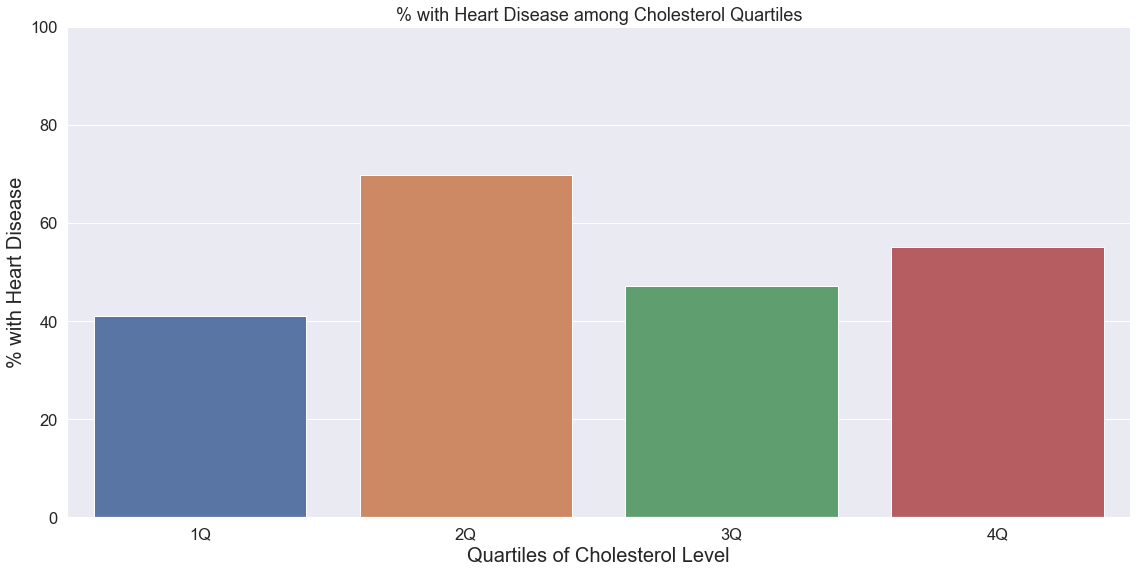

In [23]:
plot_percentage(df, 'CholesterolQuartile', 'HeartDisease')
plt.xlabel('Quartiles of Cholesterol Level')
plt.ylabel('% with Heart Disease')
plt.title('% with Heart Disease among Cholesterol Quartiles')

Interesting to not that, participants in the second quartile have a higher likelihood of having Heart Disease vs participants in the other 3 quartiles.

Text(0.5, 1.0, '% with Heart Disease among Max HR Quartiles')

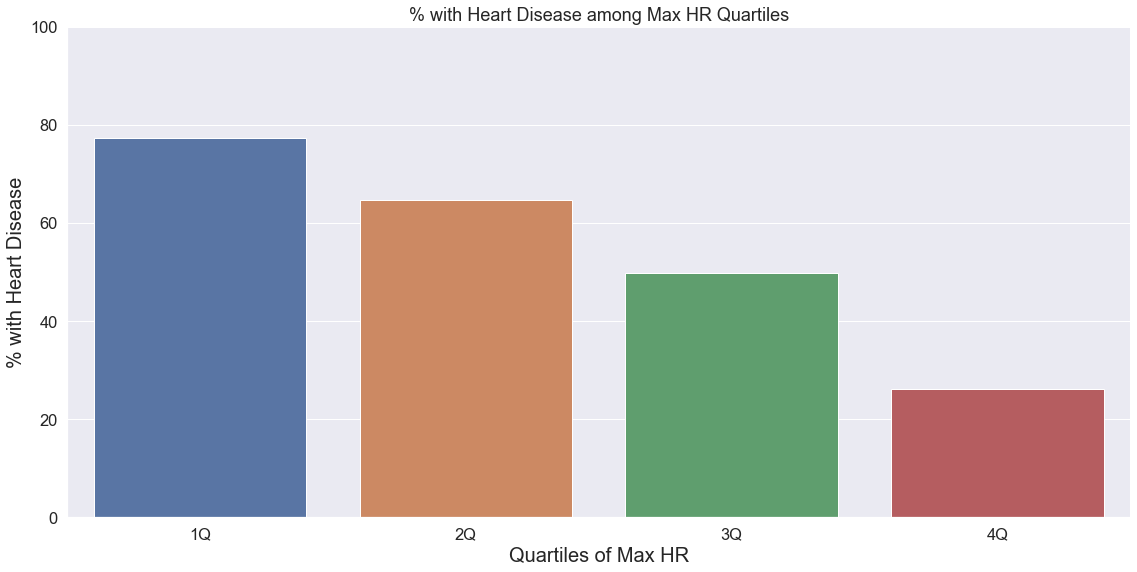

In [24]:
plot_percentage(df, 'MaxHRQuartile', 'HeartDisease')
plt.xlabel('Quartiles of Max HR')
plt.ylabel('% with Heart Disease')
plt.title('% with Heart Disease among Max HR Quartiles')

Participants in a lower Max HR quartile had a higher likelihood of having heart disease. Maybe indicating that if an individuals heart rate is able to peak at higher levels, it means that their heart is functioning better than individuals whose heart rate is peaking at lower levels.

Text(0.5, 1.0, '% with Heart Disease based on whether they experience Exercise Angina')

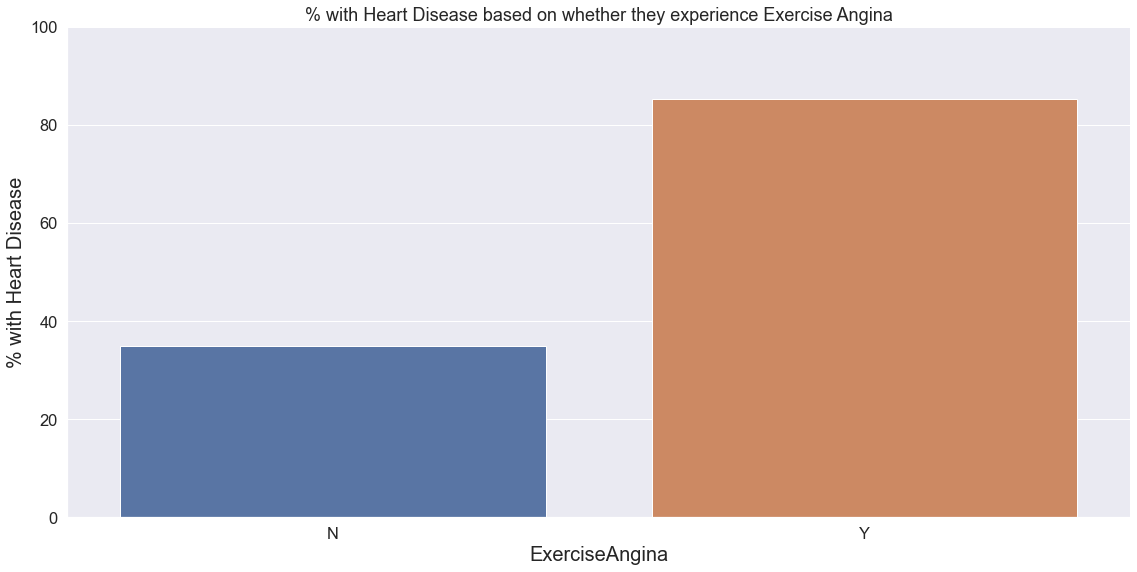

In [25]:
plot_percentage(df, 'ExerciseAngina', 'HeartDisease')
plt.xlabel('ExerciseAngina')
plt.ylabel('% with Heart Disease')
plt.title('% with Heart Disease based on whether they experience Exercise Angina')

Participants that experience exercise angina have a higher chance of having heart disease vs participants who do not experience exercise angina. This is as expected, individuals who experience chest pain during exercise are likely to have an issue.

Text(0.5, 1.0, '% with Heart Disease among types of Chest Pain')

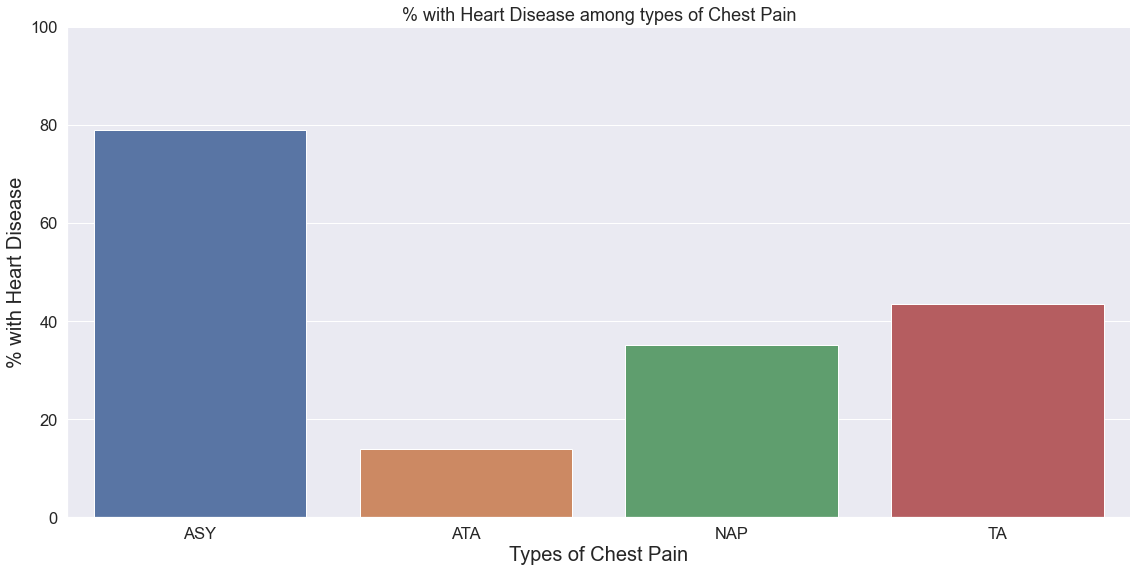

In [40]:
plot_percentage(df, 'ChestPainType', 'HeartDisease')
plt.xlabel('Types of Chest Pain')
plt.ylabel('% with Heart Disease')
plt.title('% with Heart Disease among types of Chest Pain')

We can see above that individuals that experience Asymptomatic Chest pain have a higher likelihood of having disease vs individuals that do not. Interesting to note also, expericning the other 3 kinds of chest pain isn't as strong of an indicator to having heart disease.

Text(0.5, 1.0, '% with Heart Disease among different ages')

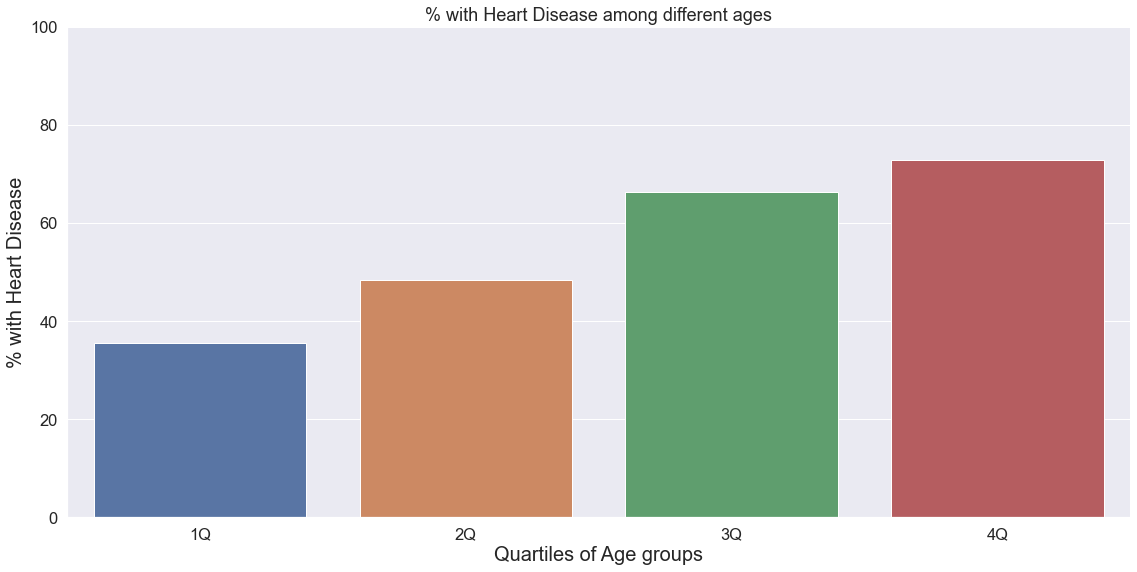

In [32]:
plot_percentage(df, 'AgeQuartile', 'HeartDisease')
plt.xlabel('Quartiles of Age groups')
plt.ylabel('% with Heart Disease')
plt.title('% with Heart Disease among different ages')

The data above is not normally distributed, the likelihood of NOT having heart disease is skewed towards the left tail
People are more likely to have heart disease as they age.

Text(0.5, 1.0, '% with Heart Disease based on Fasting Blood Sugar')

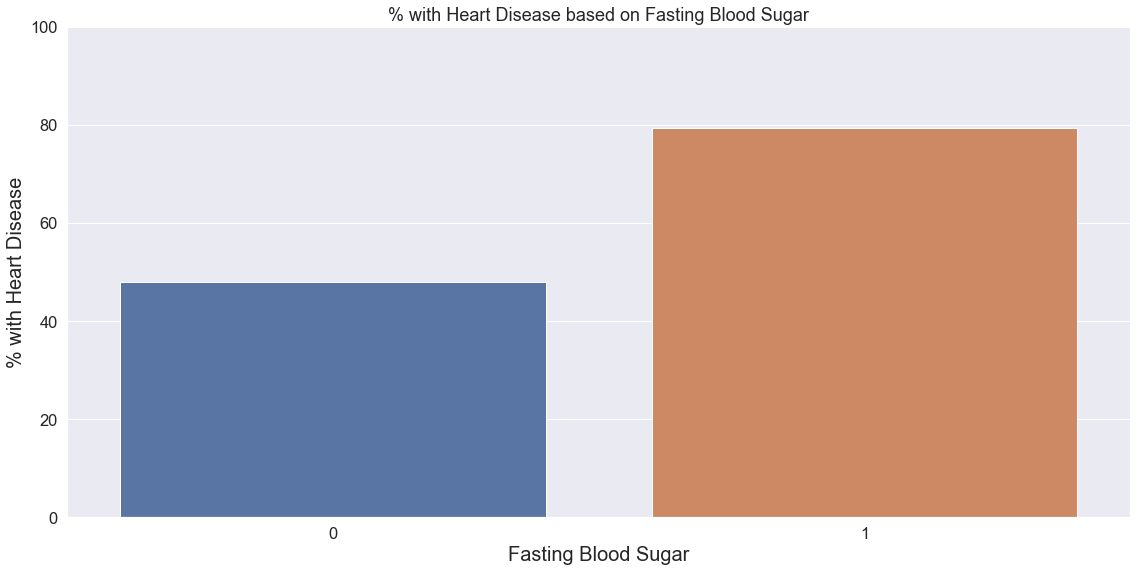

In [26]:
plot_percentage(df, 'FastingBS', 'HeartDisease')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('% with Heart Disease')
plt.title('% with Heart Disease based on Fasting Blood Sugar')

Fasting blood sugar level above 120 mg/dl (characterized as 1 on the x-axis) indicates a higher likelihood of having heart disease. This is to be expected as insulin production has a direct impact on heart health.

Text(0.5, 1.0, '% with Heart Disease based on RestingECG')

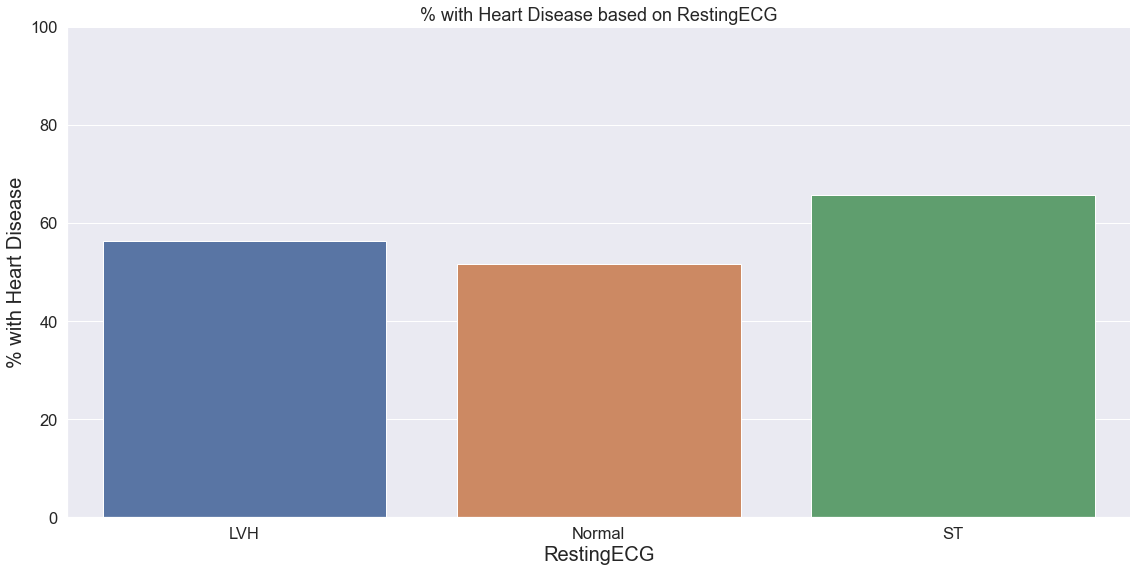

In [27]:
plot_percentage(df, 'RestingECG', 'HeartDisease')
plt.xlabel('RestingECG')
plt.ylabel('% with Heart Disease')
plt.title('% with Heart Disease based on RestingECG')

Proportinally, Resting ECG doesn't seem to be a tell on whether Men or Women have Heart Disease.

Text(0.5, 1.0, '% with Heart Disease based on ST_Slope')

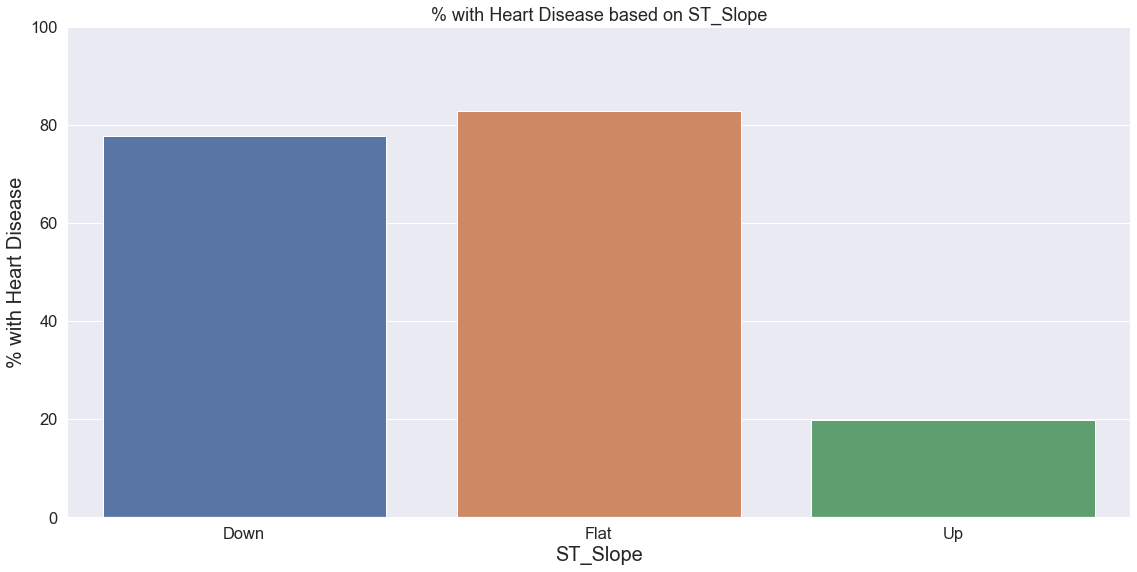

In [28]:
plot_percentage(df, 'ST_Slope', 'HeartDisease')
plt.xlabel('ST_Slope')
plt.ylabel('% with Heart Disease')
plt.title('% with Heart Disease based on ST_Slope')

This is the most telling chart so far, people with a Flat or Downward ST Slope are significantly more likely to have Heart Disease vs people with an upward ST Slope. This is something to keep an eye on going forward.

Text(0.5, 1.0, '% with Heart Disease based on Sex')

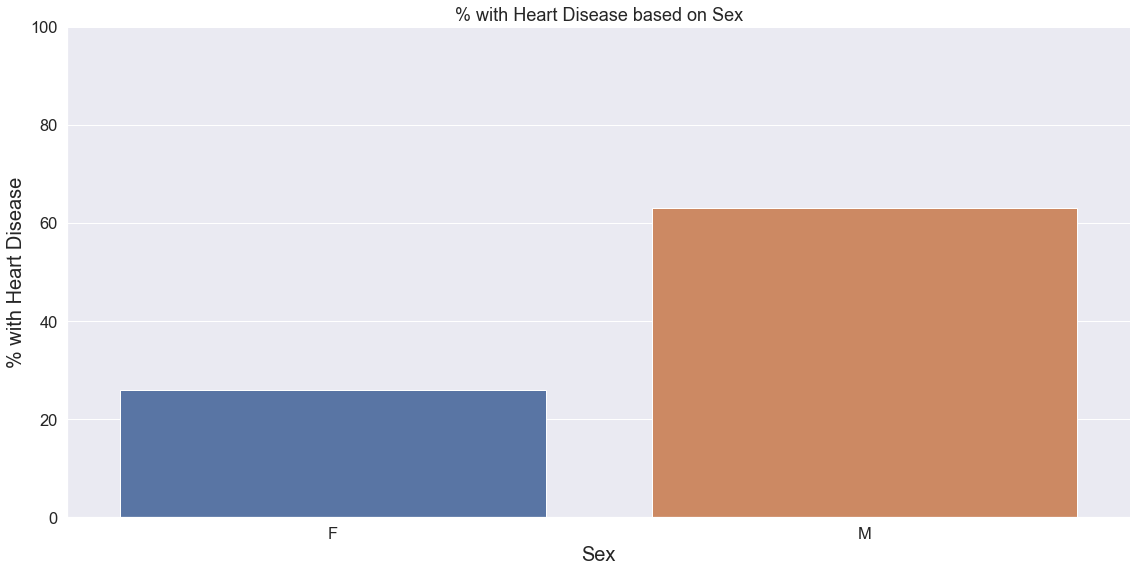

In [29]:
plot_percentage(df, 'Sex', 'HeartDisease')
plt.xlabel('Sex')
plt.ylabel('% with Heart Disease')
plt.title('% with Heart Disease based on Sex')

The figure above shows that men are more likely to have heart disease than women. This could be based on external factors so I am not going to take the chart at face value. 

Text(0.5, 1.0, 'Boxplot of Heart Disease vs Resting Blood Pressure')

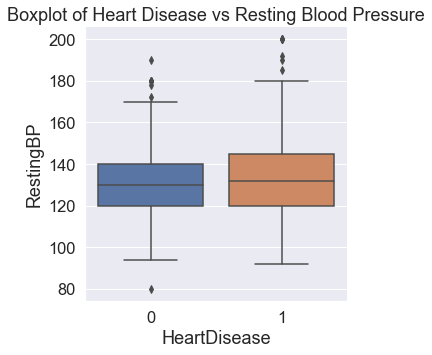

In [32]:
sns.catplot(x='HeartDisease',y='RestingBP',data=df, kind='box')
plt.xlabel('HeartDisease')
plt.ylabel('RestingBP')
plt.title('Boxplot of Heart Disease vs Resting Blood Pressure')

The Median for RestingBP is about the same for groups with and without Heart Disease but the IQR range is larger
for people with Heart Disease. The minimum floor is lower and maximum floor is higher for people w HD as well.

Text(0.5, 1.0, 'Boxplot of Heart Disease vs Cholesterol Levels')

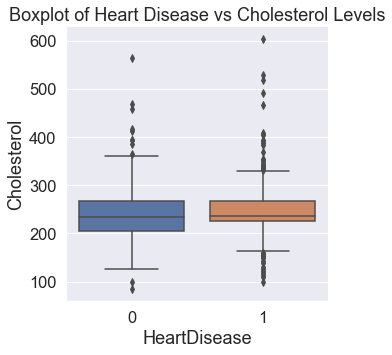

In [33]:
sns.catplot(x='HeartDisease',y='Cholesterol',data=df, kind='box')
plt.xlabel('HeartDisease')
plt.ylabel('Cholesterol')
plt.title('Boxplot of Heart Disease vs Cholesterol Levels')

The 'Cholesterol' IQR range is much smaller for people with HD vs people without HD. But, there are significantly more outliers in 'Cholesterol' for people with HD. Possibly indicating that a non-normal range of Cholesterol levels is an indicator of having heart disease.

Text(0.5, 1.0, 'Boxplot of Heart Disease vs Oldpeak Levels')

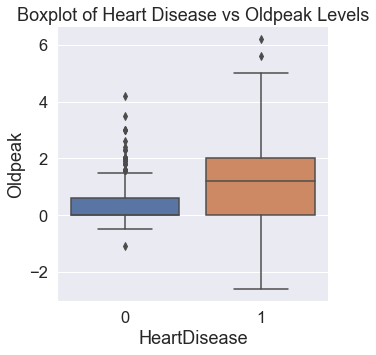

In [34]:
sns.catplot(x='HeartDisease',y='Oldpeak',data=df, kind='box')
plt.xlabel('HeartDisease')
plt.ylabel('Oldpeak')
plt.title('Boxplot of Heart Disease vs Oldpeak Levels')

Regarding the ST depression, the IQR, minimum, and maximum for the people with heart disease is a much higher range
vs without people without heart disease. The median calculate ST Depression is higher than for people with heart
disease vs people without. 

ST depression value less than 0.5 is considered normal, which explains why the IQR for no HD is so close to 0.

Text(0.5, 1.0, 'Boxplot of Heart Disease vs Max Heart Rate')

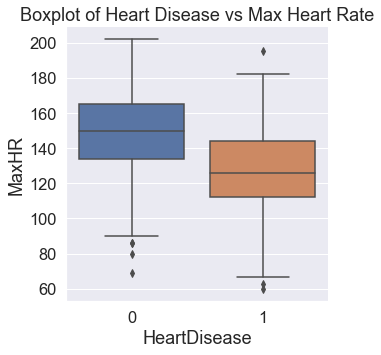

In [35]:
sns.catplot(x='HeartDisease',y='MaxHR',data=df, kind='box')
plt.xlabel('HeartDisease')
plt.ylabel('MaxHR')
plt.title('Boxplot of Heart Disease vs Max Heart Rate')

Regarding the maximum HR, the IQR, minimum, and maximum for the people with heart disease is a much lower range
vs without people without heart disease. This could be explained by the fact that the heart of people without heart
disease functions better than the people without, on average. 

Text(743.855, 0.5, 'RestingBP')

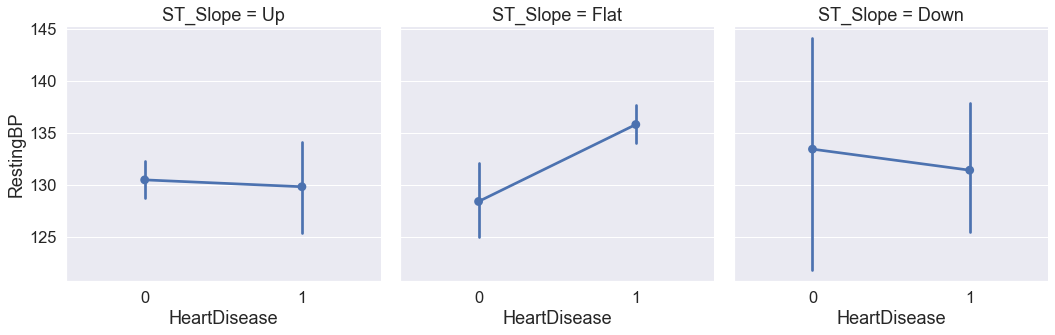

In [38]:
sns.catplot(x='HeartDisease', y='RestingBP', data=df, kind='point', col='ST_Slope')
plt.xlabel('HeartDisease')
plt.ylabel('RestingBP')

The chart in the middle shows a significant data point, people with a higher resting blood pressure and Flat ST slope 
tend to have heart disease. The bottom of the 95% confidence interval for Flat ST_slope for people with a heart disease is higher than the top the of 95% confidence interval for people with a Flat st_slope.

<AxesSubplot:>

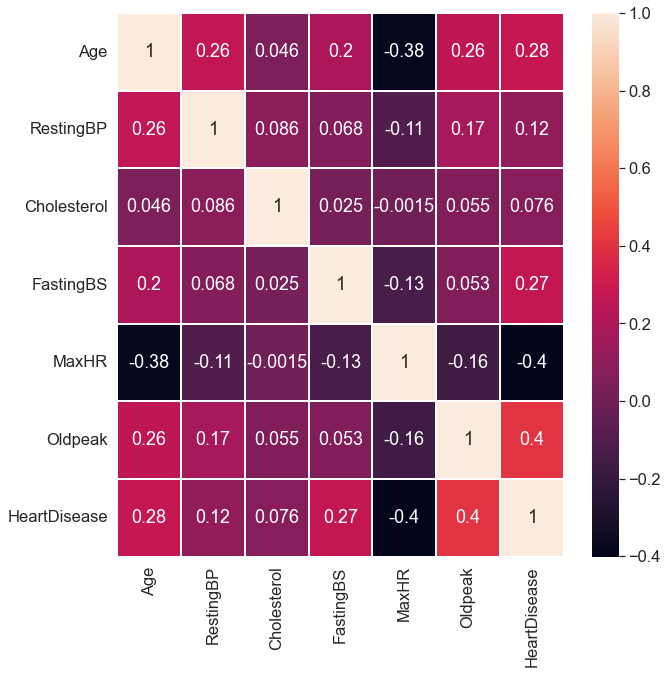

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=.05, annot=True, ax=ax)

The quantitative data doesn't show any strong correlations either positively or negatively.

I will use a Random Forest Classified to get a list of the most important features in the dataset.

In [50]:
new_df = pd.get_dummies(df)

new_df.dtypes

Age                         int64
RestingBP                   int64
Cholesterol                 int64
FastingBS                   int64
MaxHR                       int64
Oldpeak                   float64
HeartDisease                int64
Sex_F                       uint8
Sex_M                       uint8
ChestPainType_ASY           uint8
ChestPainType_ATA           uint8
ChestPainType_NAP           uint8
ChestPainType_TA            uint8
RestingECG_LVH              uint8
RestingECG_Normal           uint8
RestingECG_ST               uint8
ExerciseAngina_N            uint8
ExerciseAngina_Y            uint8
ST_Slope_Down               uint8
ST_Slope_Flat               uint8
ST_Slope_Up                 uint8
RestingBPQuartile_1Q        uint8
RestingBPQuartile_2Q        uint8
RestingBPQuartile_3Q        uint8
RestingBPQuartile_4Q        uint8
CholesterolQuartile_1Q      uint8
CholesterolQuartile_2Q      uint8
CholesterolQuartile_3Q      uint8
CholesterolQuartile_4Q      uint8
MaxHRQuartile_

[Text(0, 0, '0.005'),
 Text(0, 0, '0.005'),
 Text(0, 0, '0.006'),
 Text(0, 0, '0.006'),
 Text(0, 0, '0.007'),
 Text(0, 0, '0.007'),
 Text(0, 0, '0.007'),
 Text(0, 0, '0.008'),
 Text(0, 0, '0.008'),
 Text(0, 0, '0.008'),
 Text(0, 0, '0.009'),
 Text(0, 0, '0.009'),
 Text(0, 0, '0.009'),
 Text(0, 0, '0.009'),
 Text(0, 0, '0.01'),
 Text(0, 0, '0.01'),
 Text(0, 0, '0.01'),
 Text(0, 0, '0.011'),
 Text(0, 0, '0.011'),
 Text(0, 0, '0.012'),
 Text(0, 0, '0.013'),
 Text(0, 0, '0.016'),
 Text(0, 0, '0.021'),
 Text(0, 0, '0.022'),
 Text(0, 0, '0.027'),
 Text(0, 0, '0.027'),
 Text(0, 0, '0.048'),
 Text(0, 0, '0.05'),
 Text(0, 0, '0.05'),
 Text(0, 0, '0.053'),
 Text(0, 0, '0.055'),
 Text(0, 0, '0.076'),
 Text(0, 0, '0.082'),
 Text(0, 0, '0.088'),
 Text(0, 0, '0.088'),
 Text(0, 0, '0.116')]

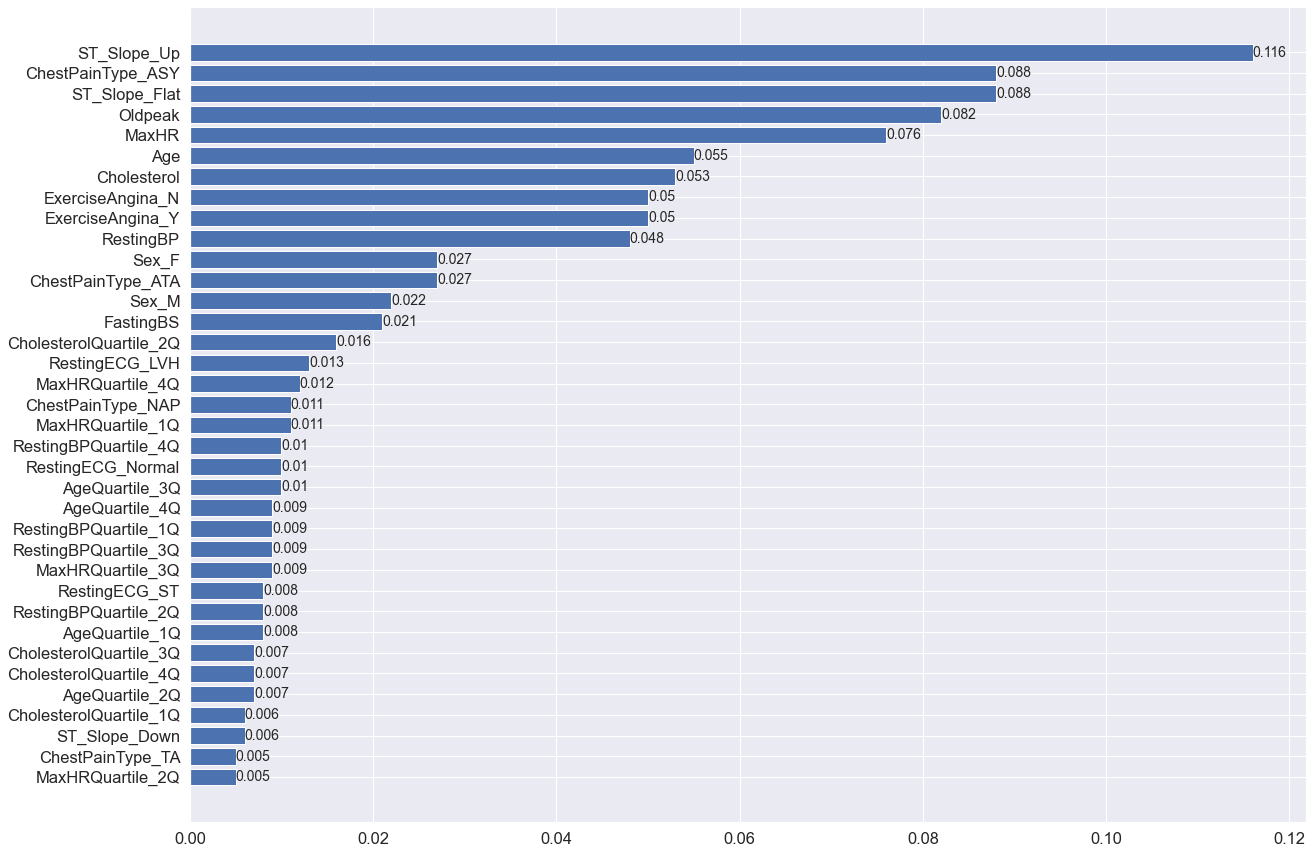

In [46]:
# Random Forest Classifier for finding the most important features
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

y = new_df['HeartDisease']
X = new_df.drop('HeartDisease', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
# plt.barh(X.columns[rf.feature_importances_.argsort()], rf.feature_importances_[rf.feature_importances_.argsort()])
rounded = np.around(rf.feature_importances_,3)

fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
bars = ax.barh(X.columns[rounded.argsort()], rounded[rounded.argsort()])
ax.set_ylim(ax.get_ylim()[::1])
ax.bar_label(bars)

I one-hot encoded all of the categorical variables and ran a Random Forest Regressor to find the most 
important features in the data set that impact Heart Disease. As seen in the data below, upward facing ST Slop, 
Max HR, and ASY Chest pain are the three most important features for predicting heart rate. I am surprised to see 
that Flat and Downward ST SLops are at the bottom of the chart even though percentage wise they were very telling 
on whether a person has heart disease or not.

# Conclusion

The most important conclusion seen from the Exploratory Data Analysis is people with a 'Flat' or 'Down' ST slope
and people with 'Asymptotic' Chest Pain have the highest chance of having a Heart Disease.

We also noticed that people that experience Exercise Angina tend to have heart disease,
this is the same for people that have a Fasting Blood Sugar above 120 mg/dl.

Resting ECG doesn't tell us much about whether or not a person has heart disease.

Middle Aged Men are the most likely to have Heart Disease based on the data.